In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv("/content/House Price Data.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.info()
df.describe()

df.isnull().sum()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


(13200, 7)

In [4]:
price_sqft = df['price_per_sqft']

In [10]:
# Mean ± Std Dev Method
mean = price_sqft.mean()
std = price_sqft.std()

lower = mean - 3*std
upper = mean + 3*std

df_mean = df[(price_sqft >= lower) & (price_sqft <= upper)]
df_mean.shape

(13195, 7)

In [11]:
# Percentile Method (5th–95th)
lower = price_sqft.quantile(0.05)
upper = price_sqft.quantile(0.95)

df_percentile = df[(price_sqft >= lower) & (price_sqft <= upper)]
df_percentile.shape

(11880, 7)

In [12]:
# IQR Method
Q1 = price_sqft.quantile(0.25)
Q3 = price_sqft.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df_iqr = df[(price_sqft >= lower) & (price_sqft <= upper)]
df_iqr.shape

(11935, 7)

In [13]:
# Z-Score Method
z = np.abs(stats.zscore(price_sqft))

df_z = df[z < 3]
df_z.shape

(13195, 7)

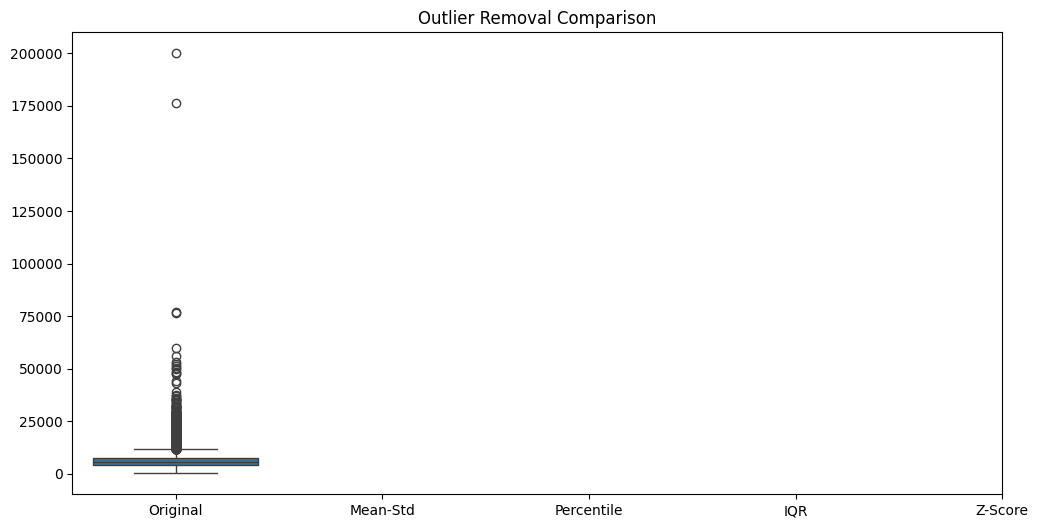

In [15]:
# Box Plot Comparison
plt.figure(figsize=(12,6))

datasets = [df, df_mean, df_percentile, df_iqr, df_z]
labels = ["Original","Mean-Std","Percentile","IQR","Z-Score"]

sns.boxplot(data=[d['price_per_sqft'] for d in datasets])
plt.xticks(range(len(labels)),labels)
plt.title("Outlier Removal Comparison")
plt.show()


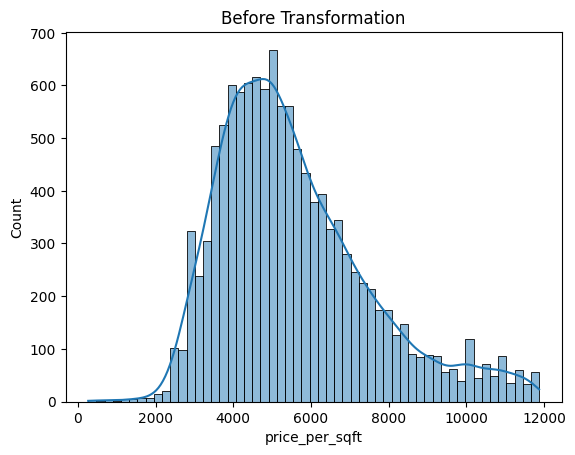

Skewness: 0.9446919636125651
Kurtosis: 0.6792271586816425


In [16]:
# Normality Check & Transformation
sns.histplot(df_iqr['price_per_sqft'], kde=True)
plt.title("Before Transformation")
plt.show()

print("Skewness:", df_iqr['price_per_sqft'].skew())
print("Kurtosis:", df_iqr['price_per_sqft'].kurt())


/tmp/ipython-input-3460073526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['log_price_sqft'] = np.log(df_iqr['price_per_sqft'])


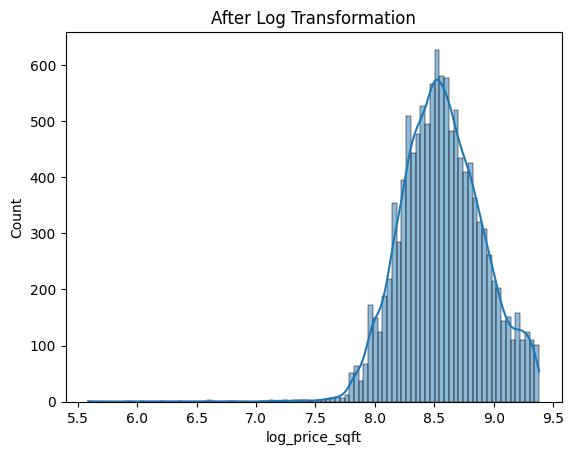

Skewness: -0.13052507558020865
Kurtosis: 1.342371834782842


In [17]:
df_iqr['log_price_sqft'] = np.log(df_iqr['price_per_sqft'])

sns.histplot(df_iqr['log_price_sqft'], kde=True)
plt.title("After Log Transformation")
plt.show()

print("Skewness:", df_iqr['log_price_sqft'].skew())
print("Kurtosis:", df_iqr['log_price_sqft'].kurt())


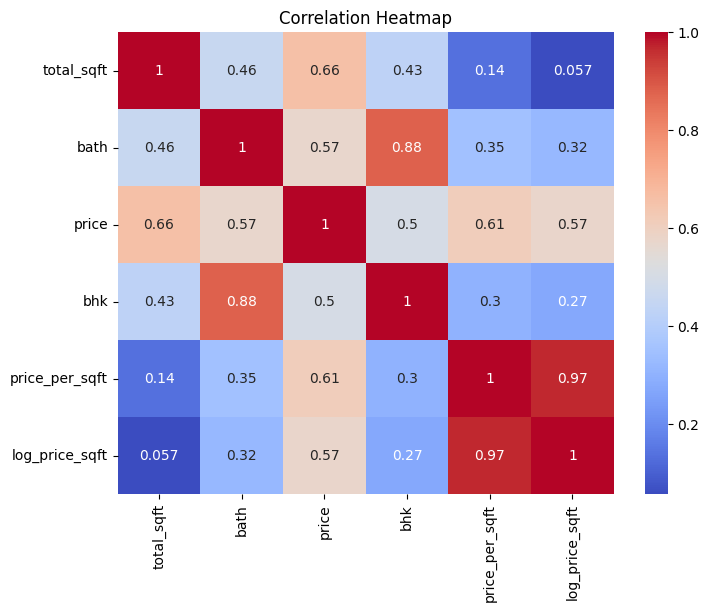

In [18]:
# Correlation + Heatmap
num_df = df_iqr.select_dtypes(include=['int64','float64'])

corr = num_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

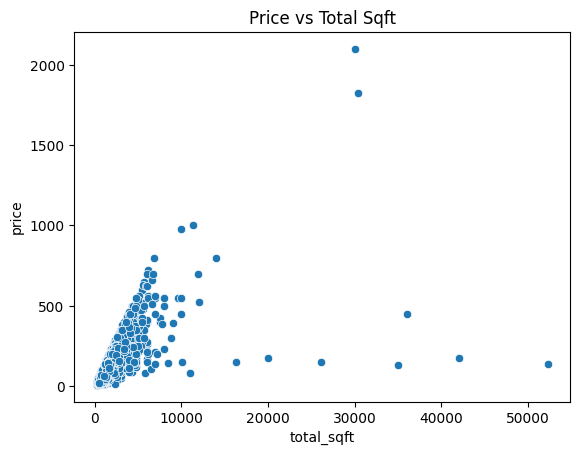

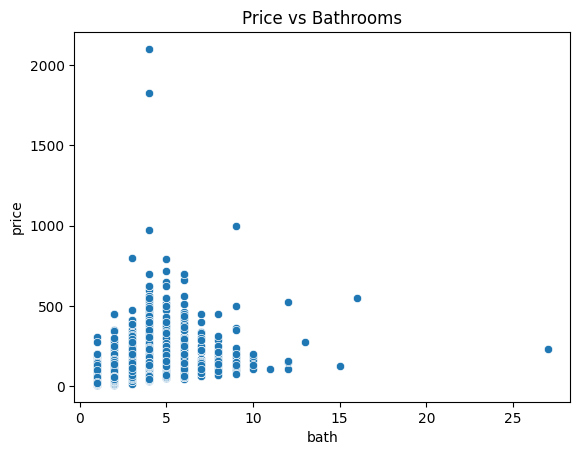

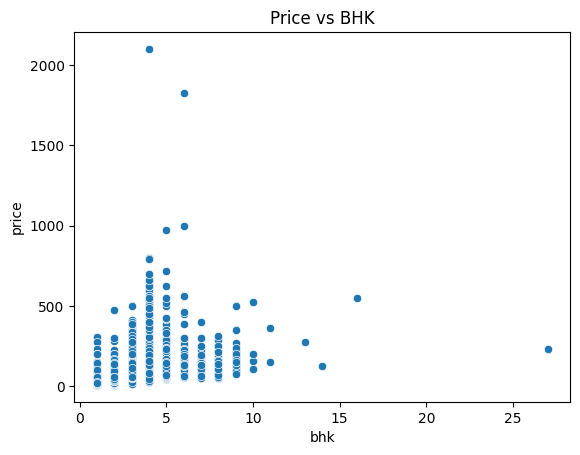

In [22]:
sns.scatterplot(data=df_iqr, x='total_sqft', y='price')
plt.title("Price vs Total Sqft")
plt.show()

sns.scatterplot(data=df_iqr, x='bath', y='price')
plt.title("Price vs Bathrooms")
plt.show()

sns.scatterplot(data=df_iqr, x='bhk', y='price')
plt.title("Price vs BHK")
plt.show()


Basic EDA showed that the price per square foot column contained strong positive skew
with several extreme outliers.

Outliers were detected using Mean–Std Dev, Percentile, IQR and Z-Score methods.
Among these, the IQR and Percentile methods gave the most reasonable results by
removing extreme anomalies while retaining useful values.

Box plot comparison confirmed that the IQR / Percentile filtered data appeared stable.

Normality testing showed that the data was right-skewed.
Log transformation reduced skewness and kurtosis, improving normal distribution.

Correlation and scatter plots showed relationships between price, size, and other
numerical variables.

Overall, the analysis improves data quality before applying ML models.
